In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from matplotlib.patches import Wedge
import seaborn as sns
import geopandas as gpd
from pypinyin import lazy_pinyin, Style
#pip install pypinyin
import json
import urllib
import math
from shapely.geometry import Point

In [2]:
boundary_d_path = "Data_2/310000_full.shp"
boundary_d = gpd.read_file(boundary_d_path)
boundary_d.shape

(16, 10)

In [3]:
print(boundary_d.crs)

EPSG:4326


In [4]:
print(boundary_d.columns)

Index(['adcode', 'name', 'center', 'centroid', 'childrenNu', 'level', 'parent',
       'subFeature', 'acroutes', 'geometry'],
      dtype='object')


In [5]:
boundary_d.head()

,adcode,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,geometry
0,310101,é»æµ¦åº,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((121.45769 31.22020, 121.45676 31.223..."
1,310104,å¾æ±åº,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((121.45769 31.22020, 121.46071 31.213..."
2,310105,é¿å®åº,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((121.43946 31.21448, 121.43746 31.211..."
3,310106,éå®åº,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((121.45769 31.22020, 121.45218 31.217..."
4,310107,æ®éåº,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((121.35418 31.23712, 121.35605 31.237..."


In [6]:
# 定义新的区名称列表
new_names = [
    "黄浦区", "徐汇区", "长宁区", "静安区", "普陀区", 
    "虹口区", "杨浦区", "闵行区", "宝山区", "嘉定区", 
    "浦东新区", "金山区", "松江区", "青浦区", "奉贤区", "崇明区"
]

# 检查列名是否正确
print(boundary_d.columns)

# 将 'name' 列重命名
boundary_d['name'] = new_names
boundary_d.head()

Index(['adcode', 'name', 'center', 'centroid', 'childrenNu', 'level', 'parent',
       'subFeature', 'acroutes', 'geometry'],
      dtype='object')


,adcode,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,geometry
0,310101,黄浦区,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((121.45769 31.22020, 121.45676 31.223..."
1,310104,徐汇区,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((121.45769 31.22020, 121.46071 31.213..."
2,310105,长宁区,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((121.43946 31.21448, 121.43746 31.211..."
3,310106,静安区,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((121.45769 31.22020, 121.45218 31.217..."
4,310107,普陀区,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((121.35418 31.23712, 121.35605 31.237..."


In [7]:
population_density_path = 'Data_1/population_density.csv'
population_density = pd.read_csv(population_density_path, encoding='utf-8-sig')
population_density.head()

,name,type,population,density,households,0_m,0_f,1_4_m,1_4_f,25_29_m,25_29_f
0,黄浦区,区,662030,32302.0,230246.0,1166.0,1093.0,7546.0,6929.0,30638.0,24761.0
1,南京东路街道,街道,69826,29141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,外滩街道,街道,52188,23855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,半淞园路街道,街道,115278,40417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,小东门街道,街道,53497,20360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#population_density = population_density[~population_density['type'].str.contains("区")]

In [9]:
bcr_path = 'Data_1/shanghai_bcr.csv'
bcr_2023 = pd.read_csv(bcr_path, encoding='utf-8-sig')

bcr_2023_1 = bcr_2023.copy()

print(bcr_2023_1.head(5))

  name     location   location_1 date         time services   longitude  \
0  合生汇  翔殷路1099号L1层  翔殷路1099号L1层  1-7  10:00-22:00      母婴室  121.525085   
1  合生汇  翔殷路1099号L3层  翔殷路1099号L3层  1-7  10:00-22:00      母婴室  121.525085   
2  合生汇  翔殷路1099号L4层  翔殷路1099号L4层  1-7  10:00-22:00      母婴室  121.525085   
3  合生汇  翔殷路1099号L5层  翔殷路1099号L5层  1-7  10:00-22:00      母婴室  121.525085   
4  合生汇  翔殷路1099号B2层  翔殷路1099号B2层  1-7  10:00-22:00      母婴室  121.525085   

    latitude  
0  31.305877  
1  31.305877  
2  31.305877  
3  31.305877  
4  31.305877  


In [10]:
x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626
a = 6378245.0
ee = 0.00669342162296594323 


def bd09_to_gcj02(bd_lon, bd_lat):
   
    x = bd_lon - 0.0065
    y = bd_lat - 0.006
    z = math.sqrt(x * x + y * y) - 0.00002 * math.sin(y * x_pi)
    theta = math.atan2(y, x) - 0.000003 * math.cos(x * x_pi)
    gg_lng = z * math.cos(theta)
    gg_lat = z * math.sin(theta)
    return [gg_lng, gg_lat]
def gcj02_to_wgs84(lng, lat):
    
    if out_of_china(lng, lat):
        return [lng, lat]
    dlat = _transformlat(lng - 105.0, lat - 35.0)
    dlng = _transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [lng * 2 - mglng, lat * 2 - mglat]
def bd09_to_wgs84(bd_lon, bd_lat):
    lon, lat = bd09_to_gcj02(bd_lon, bd_lat)
    return gcj02_to_wgs84(lon, lat)
def bd09_to_wgs84(bd_lon, bd_lat):
    lon, lat = bd09_to_gcj02(bd_lon, bd_lat)
    return gcj02_to_wgs84(lon, lat)
def gcj02_to_bd09(lng, lat):
    
    z = math.sqrt(lng * lng + lat * lat) + 0.00002 * math.sin(lat * x_pi)
    theta = math.atan2(lat, lng) + 0.000003 * math.cos(lng * x_pi)
    bd_lng = z * math.cos(theta) + 0.0065
    bd_lat = z * math.sin(theta) + 0.006
    return [bd_lng, bd_lat]
def wgs84_to_gcj02(lng, lat):
   
    if out_of_china(lng, lat): 
        return [lng, lat]
    dlat = _transformlat(lng - 105.0, lat - 35.0)
    dlng = _transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [mglng, mglat]
def wgs84_to_bd09(lon, lat):
    lon, lat = wgs84_to_gcj02(lon, lat)
    return gcj02_to_bd09(lon, lat)

def out_of_china(lng, lat):

    return not (lng > 73.66 and lng < 135.05 and lat > 3.86 and lat < 53.55)

def _transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret
def _transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
          0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret

In [11]:
bcr_2023_1[['longitude_wgs84', 'latitude_wgs84']] = bcr_2023_1.apply(
    lambda row: bd09_to_wgs84(row['longitude'], row['latitude']), axis=1, result_type='expand'
)

bcr_2023_1.head()

,name,location,location_1,date,time,services,longitude,latitude,longitude_wgs84,latitude_wgs84
0,合生汇,翔殷路1099号L1层,翔殷路1099号L1层,1-7,10:00-22:00,母婴室,121.525085,31.305877,121.514178,31.30213
1,合生汇,翔殷路1099号L3层,翔殷路1099号L3层,1-7,10:00-22:00,母婴室,121.525085,31.305877,121.514178,31.30213
2,合生汇,翔殷路1099号L4层,翔殷路1099号L4层,1-7,10:00-22:00,母婴室,121.525085,31.305877,121.514178,31.30213
3,合生汇,翔殷路1099号L5层,翔殷路1099号L5层,1-7,10:00-22:00,母婴室,121.525085,31.305877,121.514178,31.30213
4,合生汇,翔殷路1099号B2层,翔殷路1099号B2层,1-7,10:00-22:00,母婴室,121.525085,31.305877,121.514178,31.30213


In [12]:
bcr_2023_1 = bcr_2023_1[~((bcr_2023_1['longitude'] == 0.000000) & (bcr_2023_1['latitude'] == 0.000000))]

In [13]:
filtered_population_density = population_density[population_density['type'] == '区']

merged_data = boundary_d.merge(filtered_population_density, on='name')

merged_data.head(15)

,adcode,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,geometry,type,population,density,households,0_m,0_f,1_4_m,1_4_f,25_29_m,25_29_f
0,310101,黄浦区,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((121.45769 31.22020, 121.45676 31.223...",区,662030,32302.0,230246.0,1166.0,1093.0,7546.0,6929.0,30638.0,24761.0
1,310104,徐汇区,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((121.45769 31.22020, 121.46071 31.213...",区,1113078,20181.0,414874.0,2288.0,2218.0,14368.0,13312.0,45200.0,48206.0
2,310105,长宁区,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((121.43946 31.21448, 121.43746 31.211...",区,693051,18651.0,268009.0,1557.0,1413.0,8339.0,8096.0,29518.0,29518.0
3,310106,静安区,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((121.45769 31.22020, 121.45218 31.217...",区,975707,26539.0,480390.0,2089.0,1967.0,12711.0,11673.0,35054.0,38413.0
4,310107,普陀区,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((121.35418 31.23712, 121.35605 31.237...",区,1239800,22477.0,480390.0,2861.0,2662.0,16549.0,15423.0,46366.0,51211.0
5,310109,虹口区,NaN,NaN,0,district,NaN,5,NaN,"POLYGON ((121.48541 31.31157, 121.48566 31.303...",区,757498,32363.0,297219.0,1406.0,1323.0,8495.0,7976.0,27085.0,27854.0
6,310110,杨浦区,NaN,NaN,0,district,NaN,6,NaN,"POLYGON ((121.51649 31.24695, 121.51600 31.251...",区,1242548,20522.0,463292.0,2640.0,2387.0,15570.0,14665.0,44015.0,43441.0
7,310112,闵行区,NaN,NaN,0,district,NaN,7,NaN,"POLYGON ((121.35871 30.97786, 121.35126 30.975...",区,2653489,7114.0,959015.0,7364.0,6966.0,44235.0,40968.0,132985.0,115942.0
8,310113,宝山区,NaN,NaN,0,district,NaN,8,NaN,"POLYGON ((121.42525 31.27066, 121.41950 31.265...",区,2235218,7392.0,877311.0,5785.0,5214.0,35297.0,33019.0,99112.0,85871.0
9,310114,嘉定区,NaN,NaN,0,district,NaN,9,NaN,"POLYGON ((121.15374 31.27665, 121.15548 31.278...",区,1834258,3963.0,730646.0,5332.0,4913.0,32079.0,28970.0,100857.0,79671.0


In [14]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   adcode      16 non-null     int64   
 1   name        16 non-null     object  
 2   center      0 non-null      float64 
 3   centroid    0 non-null      float64 
 4   childrenNu  16 non-null     int64   
 5   level       16 non-null     object  
 6   parent      0 non-null      float64 
 7   subFeature  16 non-null     int64   
 8   acroutes    0 non-null      float64 
 9   geometry    16 non-null     geometry
 10  type        16 non-null     object  
 11  population  16 non-null     int64   
 12  density     16 non-null     object  
 13  households  16 non-null     float64 
 14  0_m         16 non-null     float64 
 15  0_f         16 non-null     float64 
 16  1_4_m       16 non-null     float64 
 17  1_4_f       16 non-null     float64 
 18  25_29_m     16 non-null     float64 
 19  25

# 计算上海母婴室服务人数

In [15]:
merged_data_gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')
merged_data_gdf.set_index('adcode', inplace=True) 

bcr_2023_1_gdf = gpd.GeoDataFrame(
    bcr_2023_1,
    geometry=gpd.points_from_xy(bcr_2023_1['longitude_wgs84'], bcr_2023_1['latitude_wgs84'])
)
bcr_2023_1_gdf.set_crs('EPSG:4326', inplace=True) 

merged_with_bcr = gpd.sjoin(merged_data_gdf, bcr_2023_1_gdf, how="left", predicate='contains')

print(merged_with_bcr.columns)

if 'index_left' in merged_with_bcr.columns:
    count_nursing_rooms = merged_with_bcr.groupby('index_left').size()
else:

    count_nursing_rooms = merged_with_bcr.groupby('adcode').size()

merged_data_gdf['nursing_room_count'] = count_nursing_rooms

merged_data = pd.DataFrame(merged_data_gdf.drop(columns='geometry'))
print(merged_data[['nursing_room_count']])

Index(['name_left', 'center', 'centroid', 'childrenNu', 'level', 'parent',
       'subFeature', 'acroutes', 'geometry', 'type', 'population', 'density',
       'households', '0_m', '0_f', '1_4_m', '1_4_f', '25_29_m', '25_29_f',
       'index_right', 'name_right', 'location', 'location_1', 'date', 'time',
       'services', 'longitude', 'latitude', 'longitude_wgs84',
       'latitude_wgs84'],
      dtype='object')
        nursing_room_count
adcode                    
310101                  60
310104                  90
310105                  49
310106                  93
310107                  51
310109                  26
310110                  34
310112                 152
310113                  53
310114                  59
310115                 379
310116                  30
310117                  50
310118                  27
310120                  37
310151                  34


In [16]:
merged_data.head(15)

,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,type,population,density,households,0_m,0_f,1_4_m,1_4_f,25_29_m,25_29_f,nursing_room_count
adcode,,,,,,,,,,,,,,,,,,,
310101,黄浦区,NaN,NaN,0,district,NaN,0,NaN,区,662030,32302.0,230246.0,1166.0,1093.0,7546.0,6929.0,30638.0,24761.0,60
310104,徐汇区,NaN,NaN,0,district,NaN,1,NaN,区,1113078,20181.0,414874.0,2288.0,2218.0,14368.0,13312.0,45200.0,48206.0,90
310105,长宁区,NaN,NaN,0,district,NaN,2,NaN,区,693051,18651.0,268009.0,1557.0,1413.0,8339.0,8096.0,29518.0,29518.0,49
310106,静安区,NaN,NaN,0,district,NaN,3,NaN,区,975707,26539.0,480390.0,2089.0,1967.0,12711.0,11673.0,35054.0,38413.0,93
310107,普陀区,NaN,NaN,0,district,NaN,4,NaN,区,1239800,22477.0,480390.0,2861.0,2662.0,16549.0,15423.0,46366.0,51211.0,51
310109,虹口区,NaN,NaN,0,district,NaN,5,NaN,区,757498,32363.0,297219.0,1406.0,1323.0,8495.0,7976.0,27085.0,27854.0,26
310110,杨浦区,NaN,NaN,0,district,NaN,6,NaN,区,1242548,20522.0,463292.0,2640.0,2387.0,15570.0,14665.0,44015.0,43441.0,34
310112,闵行区,NaN,NaN,0,district,NaN,7,NaN,区,2653489,7114.0,959015.0,7364.0,6966.0,44235.0,40968.0,132985.0,115942.0,152
310113,宝山区,NaN,NaN,0,district,NaN,8,NaN,区,2235218,7392.0,877311.0,5785.0,5214.0,35297.0,33019.0,99112.0,85871.0,53


In [17]:
merged_data['target'] = merged_data_gdf[['0_m', '0_f', '1_4_m', '1_4_f']].sum(axis=1)

merged_data.head()

,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,type,population,density,households,0_m,0_f,1_4_m,1_4_f,25_29_m,25_29_f,nursing_room_count,target
adcode,,,,,,,,,,,,,,,,,,,,
310101,黄浦区,NaN,NaN,0,district,NaN,0,NaN,区,662030,32302.0,230246.0,1166.0,1093.0,7546.0,6929.0,30638.0,24761.0,60,16734.0
310104,徐汇区,NaN,NaN,0,district,NaN,1,NaN,区,1113078,20181.0,414874.0,2288.0,2218.0,14368.0,13312.0,45200.0,48206.0,90,32186.0
310105,长宁区,NaN,NaN,0,district,NaN,2,NaN,区,693051,18651.0,268009.0,1557.0,1413.0,8339.0,8096.0,29518.0,29518.0,49,19405.0
310106,静安区,NaN,NaN,0,district,NaN,3,NaN,区,975707,26539.0,480390.0,2089.0,1967.0,12711.0,11673.0,35054.0,38413.0,93,28440.0
310107,普陀区,NaN,NaN,0,district,NaN,4,NaN,区,1239800,22477.0,480390.0,2861.0,2662.0,16549.0,15423.0,46366.0,51211.0,51,37495.0


In [18]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 310101 to 310151
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16 non-null     object 
 1   center              0 non-null      float64
 2   centroid            0 non-null      float64
 3   childrenNu          16 non-null     int64  
 4   level               16 non-null     object 
 5   parent              0 non-null      float64
 6   subFeature          16 non-null     int64  
 7   acroutes            0 non-null      float64
 8   type                16 non-null     object 
 9   population          16 non-null     int64  
 10  density             16 non-null     object 
 11  households          16 non-null     float64
 12  0_m                 16 non-null     float64
 13  0_f                 16 non-null     float64
 14  1_4_m               16 non-null     float64
 15  1_4_f               16 non-null     float64
 16  25_29_

In [19]:
merged_data_gdf = boundary_d.merge(merged_data, on='adcode')

In [20]:
merged_data_gdf.head()

,adcode,name_x,center_x,centroid_x,childrenNu_x,level_x,parent_x,subFeature_x,acroutes_x,geometry,...,density,households,0_m,0_f,1_4_m,1_4_f,25_29_m,25_29_f,nursing_room_count,target
0,310101,黄浦区,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((121.45769 31.22020, 121.45676 31.223...",...,32302.0,230246.0,1166.0,1093.0,7546.0,6929.0,30638.0,24761.0,60,16734.0
1,310104,徐汇区,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((121.45769 31.22020, 121.46071 31.213...",...,20181.0,414874.0,2288.0,2218.0,14368.0,13312.0,45200.0,48206.0,90,32186.0
2,310105,长宁区,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((121.43946 31.21448, 121.43746 31.211...",...,18651.0,268009.0,1557.0,1413.0,8339.0,8096.0,29518.0,29518.0,49,19405.0
3,310106,静安区,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((121.45769 31.22020, 121.45218 31.217...",...,26539.0,480390.0,2089.0,1967.0,12711.0,11673.0,35054.0,38413.0,93,28440.0
4,310107,普陀区,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((121.35418 31.23712, 121.35605 31.237...",...,22477.0,480390.0,2861.0,2662.0,16549.0,15423.0,46366.0,51211.0,51,37495.0


In [21]:
merged_data_gdf['nursing_room_count'].replace(0, pd.NA, inplace=True)
merged_data_gdf['avg_target_per_room'] = merged_data_gdf['target'] / merged_data_gdf['nursing_room_count']
merged_data_gdf['avg_target_per_room'].fillna(0, inplace=True) 

merged_data_gdf.head(5)

,adcode,name_x,center_x,centroid_x,childrenNu_x,level_x,parent_x,subFeature_x,acroutes_x,geometry,...,households,0_m,0_f,1_4_m,1_4_f,25_29_m,25_29_f,nursing_room_count,target,avg_target_per_room
0,310101,黄浦区,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((121.45769 31.22020, 121.45676 31.223...",...,230246.0,1166.0,1093.0,7546.0,6929.0,30638.0,24761.0,60,16734.0,278.900000
1,310104,徐汇区,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((121.45769 31.22020, 121.46071 31.213...",...,414874.0,2288.0,2218.0,14368.0,13312.0,45200.0,48206.0,90,32186.0,357.622222
2,310105,长宁区,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((121.43946 31.21448, 121.43746 31.211...",...,268009.0,1557.0,1413.0,8339.0,8096.0,29518.0,29518.0,49,19405.0,396.020408
3,310106,静安区,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((121.45769 31.22020, 121.45218 31.217...",...,480390.0,2089.0,1967.0,12711.0,11673.0,35054.0,38413.0,93,28440.0,305.806452
4,310107,普陀区,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((121.35418 31.23712, 121.35605 31.237...",...,480390.0,2861.0,2662.0,16549.0,15423.0,46366.0,51211.0,51,37495.0,735.196078
5,310109,虹口区,NaN,NaN,0,district,NaN,5,NaN,"POLYGON ((121.48541 31.31157, 121.48566 31.303...",...,297219.0,1406.0,1323.0,8495.0,7976.0,27085.0,27854.0,26,19200.0,738.461538
6,310110,杨浦区,NaN,NaN,0,district,NaN,6,NaN,"POLYGON ((121.51649 31.24695, 121.51600 31.251...",...,463292.0,2640.0,2387.0,15570.0,14665.0,44015.0,43441.0,34,35262.0,1037.117647
7,310112,闵行区,NaN,NaN,0,district,NaN,7,NaN,"POLYGON ((121.35871 30.97786, 121.35126 30.975...",...,959015.0,7364.0,6966.0,44235.0,40968.0,132985.0,115942.0,152,99533.0,654.822368
8,310113,宝山区,NaN,NaN,0,district,NaN,8,NaN,"POLYGON ((121.42525 31.27066, 121.41950 31.265...",...,877311.0,5785.0,5214.0,35297.0,33019.0,99112.0,85871.0,53,79315.0,1496.509434
9,310114,嘉定区,NaN,NaN,0,district,NaN,9,NaN,"POLYGON ((121.15374 31.27665, 121.15548 31.278...",...,730646.0,5332.0,4913.0,32079.0,28970.0,100857.0,79671.0,59,71294.0,1208.372881


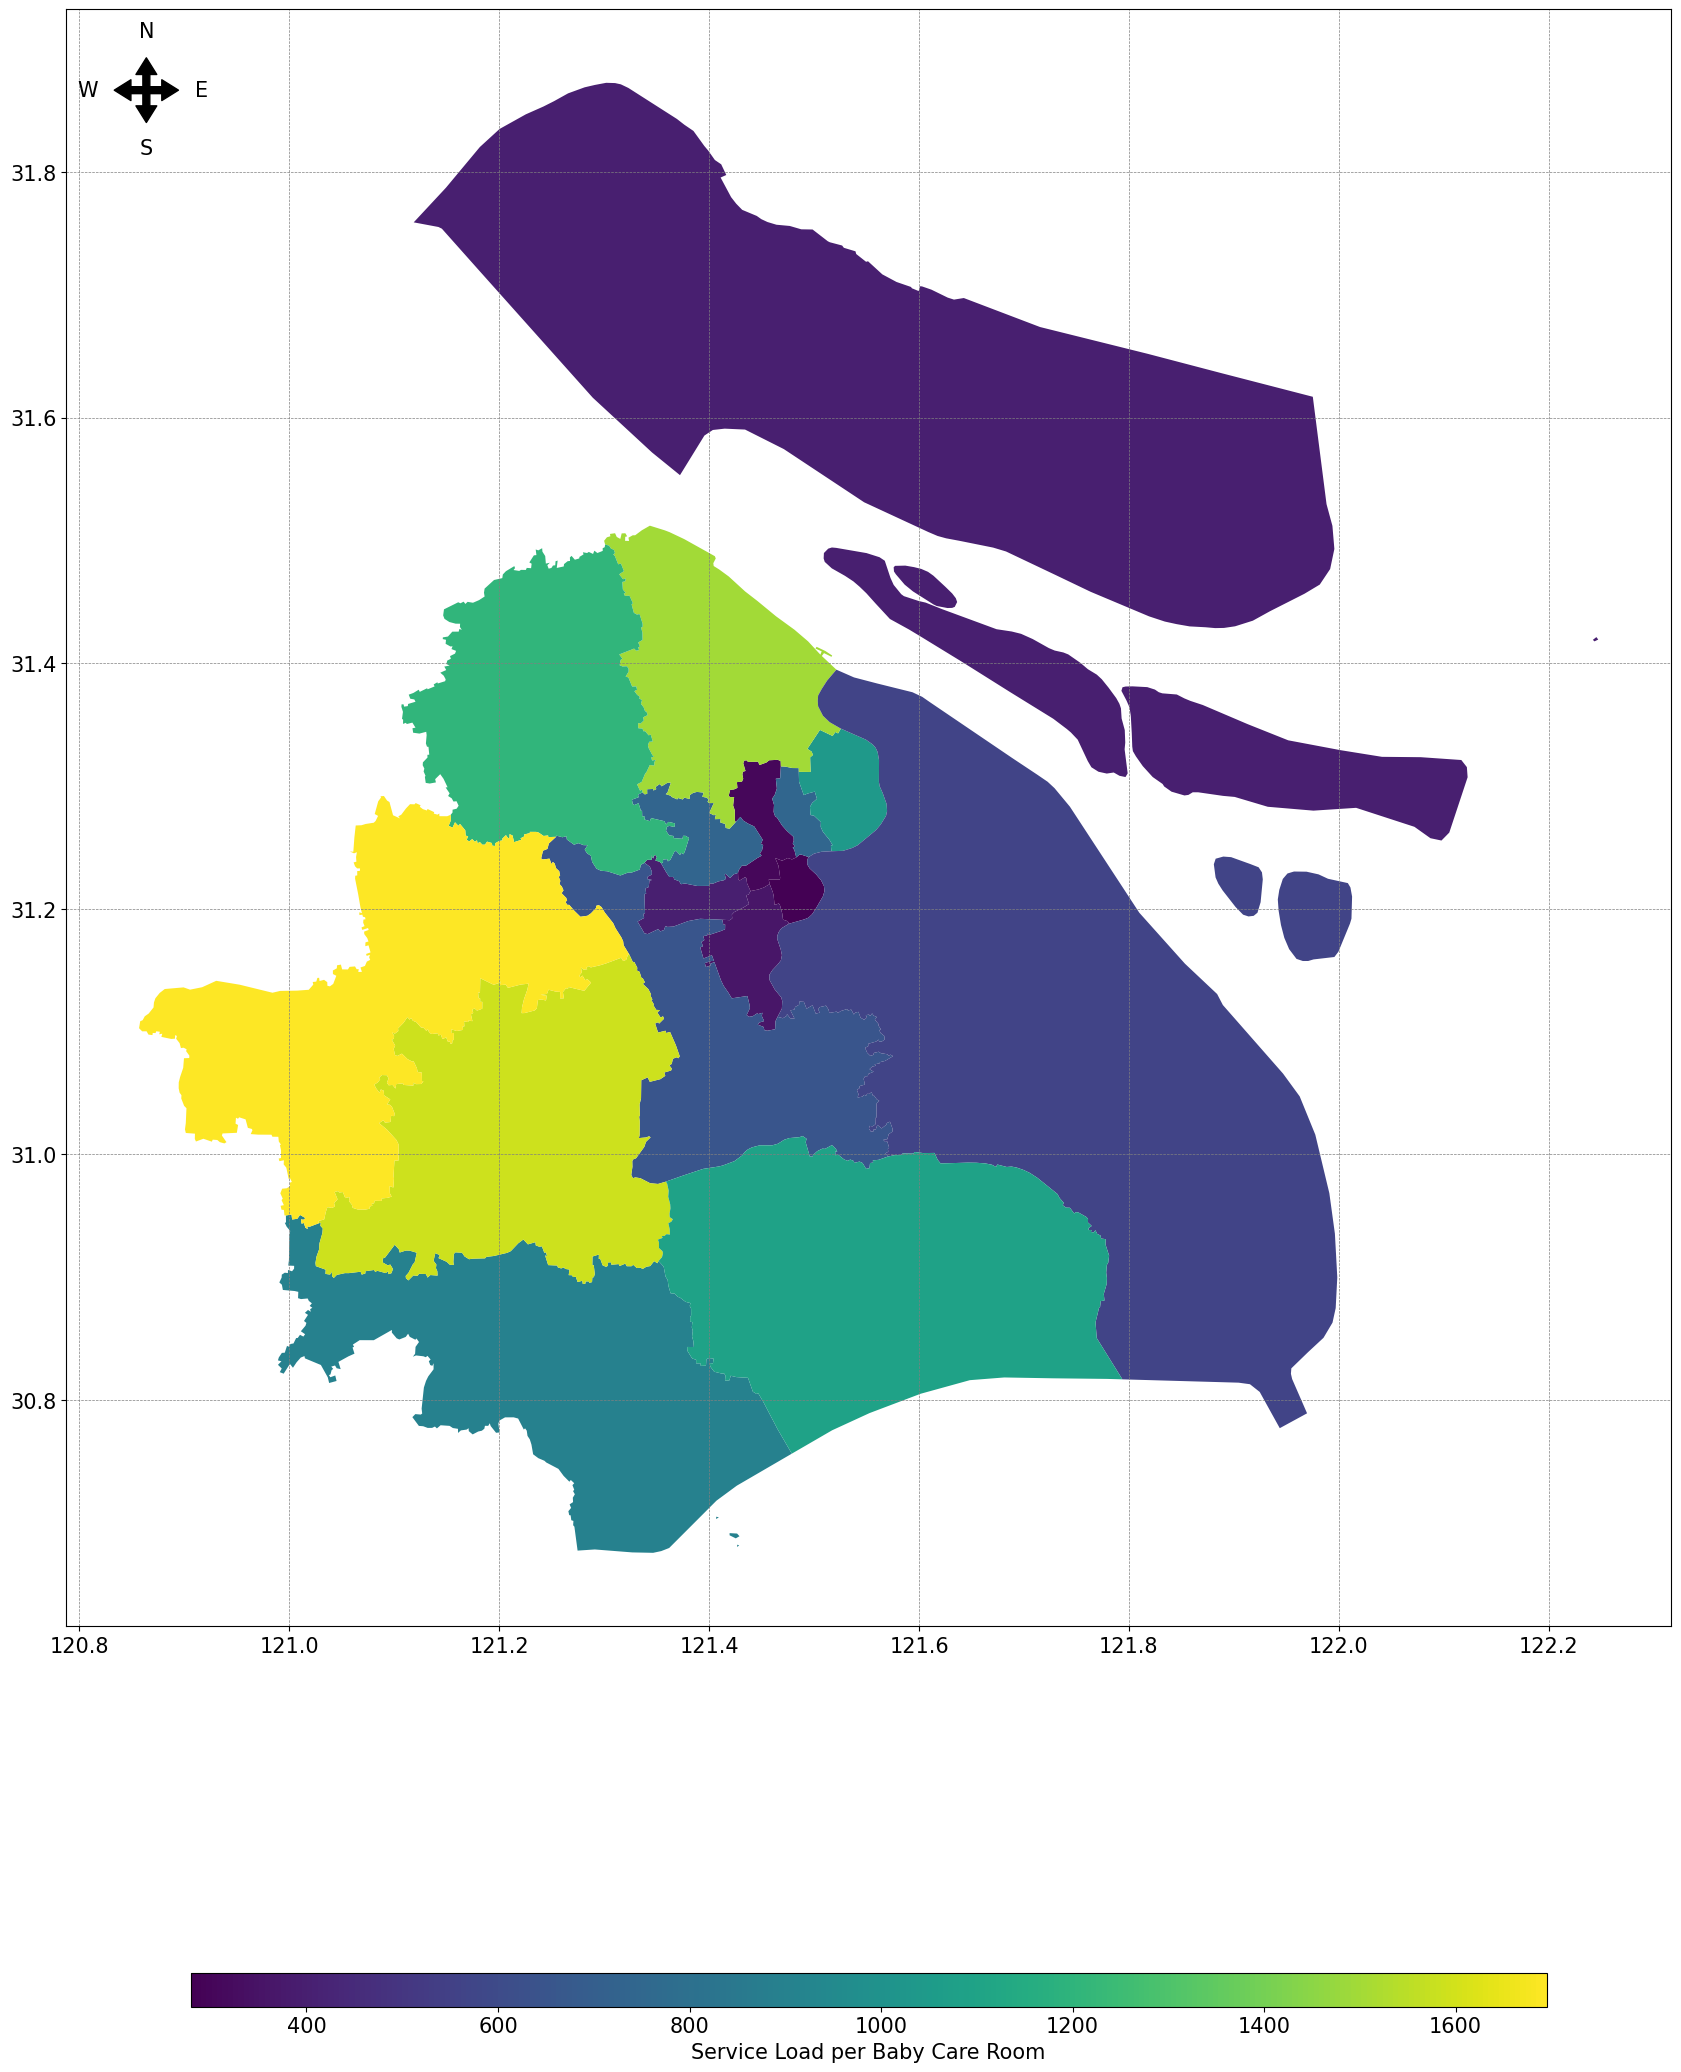

In [22]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1, figsize=(35, 30))

merged_data_gdf.plot(column='avg_target_per_room', ax=ax, legend=True,
                     legend_kwds={
                         'label': "Service Load per Baby Care Room",
                         'orientation': "horizontal",
                         'shrink': 0.5,  
                         'aspect': 40,   
                     },
                     cmap='viridis') 

compass_x = 0.05  
compass_y = 0.95  
ax.annotate('', xy=(compass_x, compass_y - 0.02), xycoords='axes fraction', xytext=(compass_x, compass_y),
            arrowprops=dict(facecolor='black', width=5, headwidth=15))
ax.annotate('', xy=(compass_x + 0.02, compass_y), xycoords='axes fraction', xytext=(compass_x, compass_y),
            arrowprops=dict(facecolor='black', width=5, headwidth=15))
ax.annotate('', xy=(compass_x - 0.02, compass_y), xycoords='axes fraction', xytext=(compass_x, compass_y),
            arrowprops=dict(facecolor='black', width=5, headwidth=15))
ax.annotate('', xy=(compass_x, compass_y + 0.02), xycoords='axes fraction', xytext=(compass_x, compass_y),
            arrowprops=dict(facecolor='black', width=5, headwidth=15))
ax.text(compass_x, compass_y + 0.03, 'N', ha='center', va='bottom', transform=ax.transAxes)
ax.text(compass_x, compass_y - 0.03, 'S', ha='center', va='top', transform=ax.transAxes)
ax.text(compass_x + 0.03, compass_y, 'E', ha='left', va='center', transform=ax.transAxes)
ax.text(compass_x - 0.03, compass_y, 'W', ha='right', va='center', transform=ax.transAxes)

ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--')

plt.savefig('output/figure 4.10.png', dpi=300, bbox_inches='tight')

plt.show()

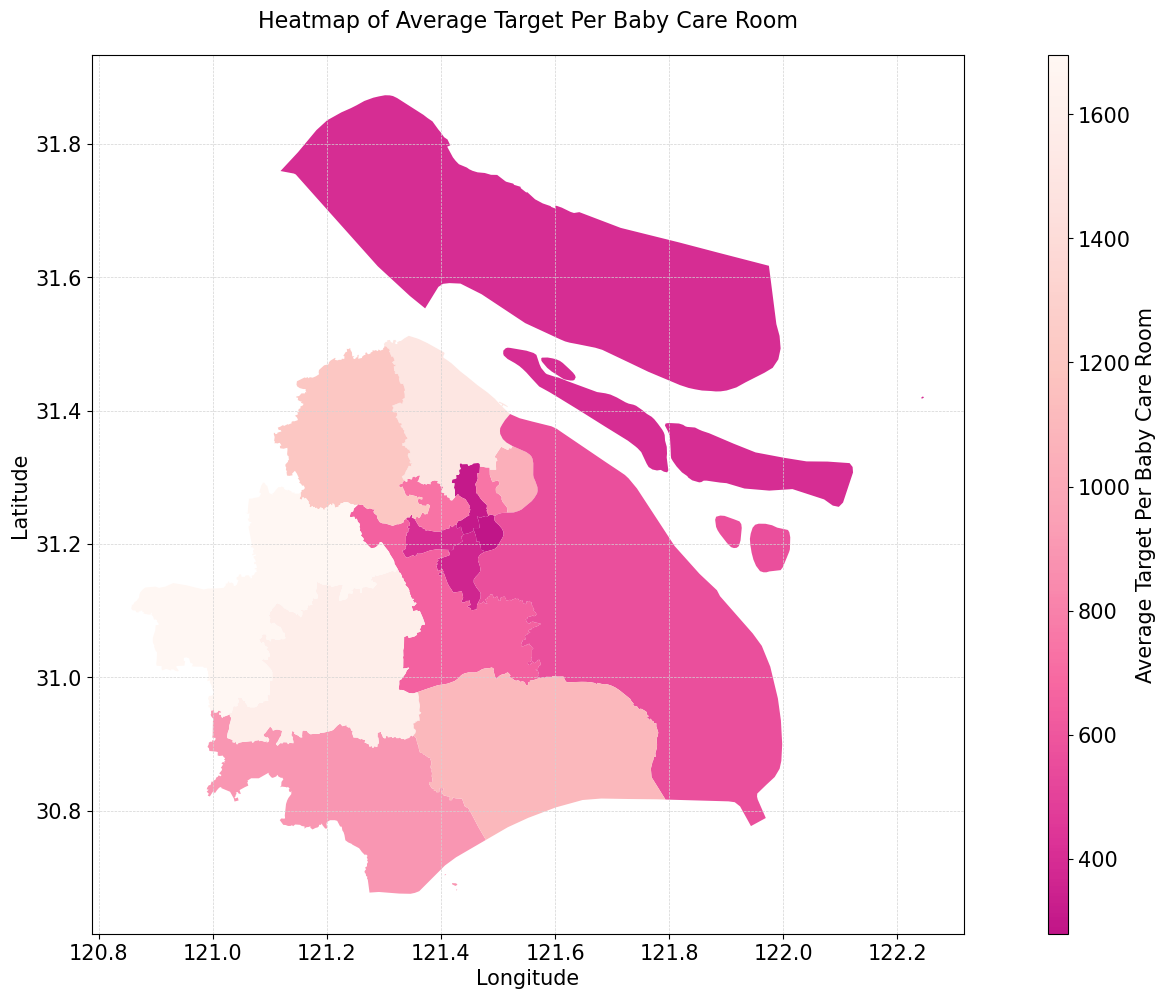

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 12))

cmap = plt.cm.RdPu_r 
new_cmap = colors.ListedColormap(cmap(np.linspace(0.3, 1, 256))) 

data_plot = merged_data_gdf.plot(column='avg_target_per_room', ax=ax, cmap=new_cmap, legend=False)

ax.set_axis_on()  
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0) 

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(ax.collections[0], cax=cax, orientation='vertical')
cbar.set_label('Average Target Per Baby Care Room')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Heatmap of Average Target Per Baby Care Room', pad=20, fontsize=16)

plt.tight_layout()

plt.show()